## 0. Setup

In [1]:
# Import dependencies
import torch
import torch.nn as nn
from plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, title, axis
import numpy as np

In [2]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [3]:
# Set up random seed to 1008. Do not change the random seed.
seed = 1008
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed_all(seed)

## 1. Data generation
#### You'll be creating data points that are generated from a particular function.

### 1.1 Quadratic: $y = f(x) = x^2$

In [4]:
# Implement the function below
def quadratic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to x^2 using torch.pow() 
    
    The function should return: x, y
    """
    # torch.rand() returns values uniformly distributed in the interval [0, 1)
    # [0, 1) *(-2)=> (-2, 0] +1=> (-1, 1] 
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.pow(x, 2)
    return x.to(device), y.to(device)

In [5]:
# Generate the data with n_samples = 128
x_quadr, y_quadr = quadratic_data_generator(128)

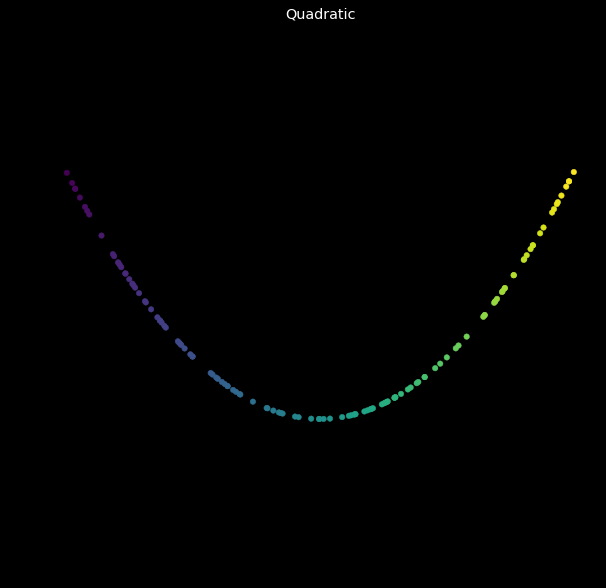

In [6]:
# Visualize the data
set_default()
# set colors
# combine data
X_quad = torch.cat((x_quadr, y_quadr), dim = 1)
colors = X_quad[:,0]
# plot
show_scatterplot(X_quad, colors, title = "Quadratic")

### 1.2 Cubic: $y = f(x) = x^3 - 0.5x$

In [7]:
# Implement the function below
def cubic_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to (x^3 - 0.5x) using torch.pow() and torch.mul() 
    
    The function should return: x, y
    """
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.pow(x, 3)  - torch.mul(x, 0.5)
    return x.to(device), y.to(device)

In [8]:
# Generate the data with n_samples = 128
x_cubic, y_cubic = cubic_data_generator(128)

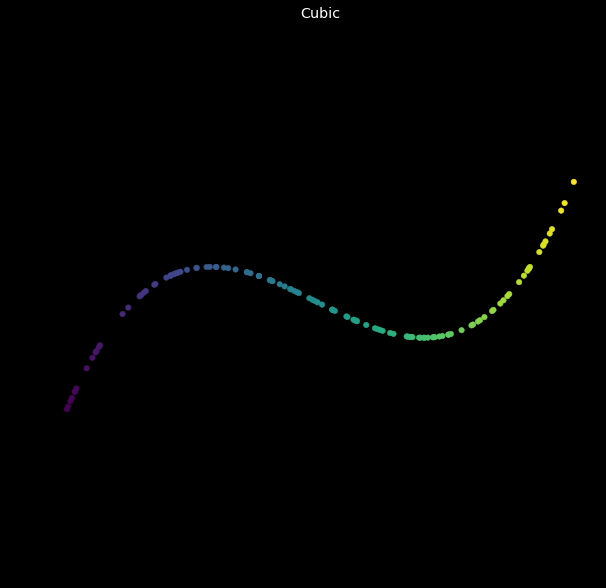

In [9]:
# Visualize the data 
X_cubic = torch.cat((x_cubic, y_cubic), dim = 1)
colors = X_cubic[:,0]
# plot
show_scatterplot(X_cubic, colors, title = "Cubic")

### 1.3 Sine: $y = f(x) = \sin(2.5x)$

In [10]:
# Implement the function below
def sine_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to sin(2.5 * x) using torch.sin() 
    
    The function should return: x, y
    """
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.sin(x * 2.5)
    return x.to(device), y.to(device)

In [11]:
# Generate the data with n_samples = 128
x_sine, y_sine = sine_data_generator(128)

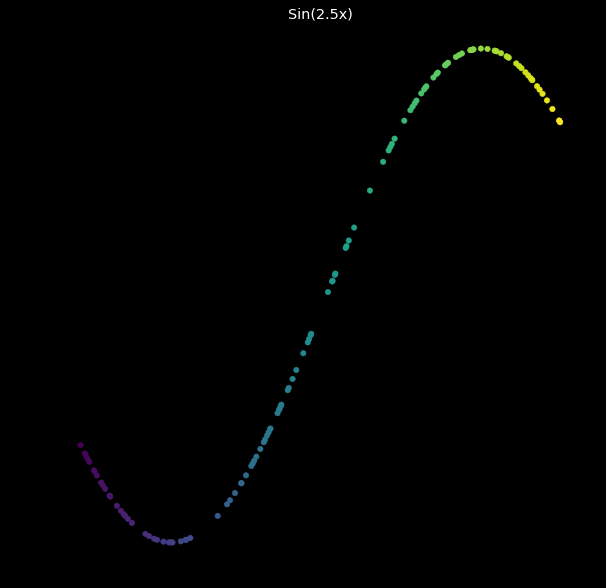

In [12]:
# Visualize the data 
X_sine = torch.cat((x_sine, y_sine), dim = 1)
colors = X_sine[:,0]
# plot
show_scatterplot(X_sine, colors, title = "Sin(2.5x)")

### 1.4 Absolute value: $y = f(x) = |x|$

In [13]:
# Implement the function below
def abs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to |x| using torch.abs() 
    
    The function should return: x, y
    """
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.abs(x)
    return x.to(device), y.to(device)

In [14]:
# Generate the data with n_samples = 128
x_abs, y_abs = abs_data_generator(128)

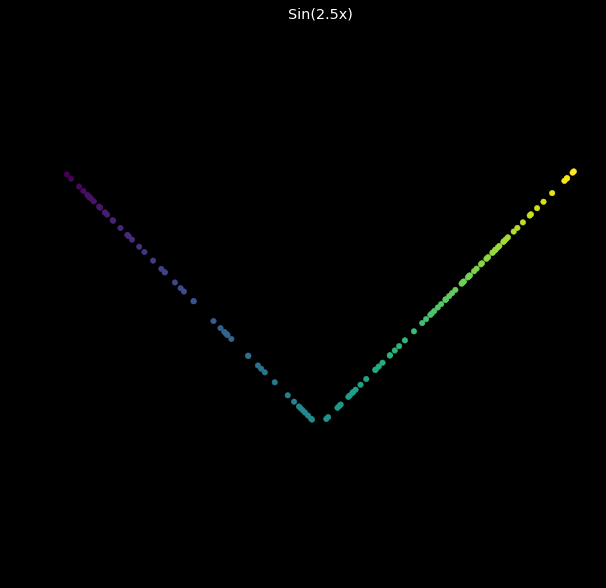

In [15]:
# Visualize the data 
X_abs = torch.cat((x_abs, y_abs), dim = 1)
colors = X_abs[:,0]
# plot
show_scatterplot(X_abs, colors, title = "Sin(2.5x)")

### 1.5 Heavyside Step Function: $y = f(x) = \begin{cases} 0, & x < 0 \\ 1, & x \geq 0 \end{cases}$

In [16]:
# Implement the function below
def hs_data_generator(n_samples):
    """
    Generate: 
    1) tensor x of size (n_samples, 1) 
    with values uniformly distributed in the interval (-1, 1] 
    using torch.rand()
    2) tensor y of size (n_samples, 1) 
    equal to the Heavyside Step Function using a condition.
    Make sure that y is a torch.FloatTensor.
    
    The function should return: x, y
    """
    x = torch.rand((n_samples, 1)) * -2  + 1
    y = torch.FloatTensor(np.array([np.heaviside(e, 1) for e in x])).view(-1, 1)
    return x.to(device), y.to(device)

In [17]:
# Generate the data with n_samples = 128
x_hs, y_hs = hs_data_generator(128)

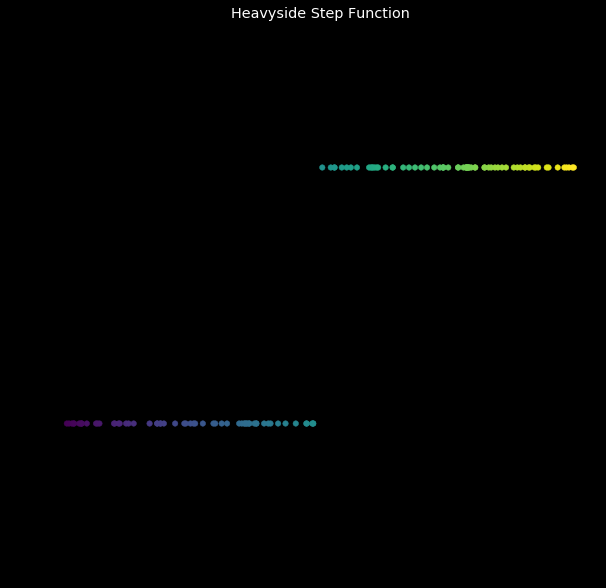

In [18]:
# Visualize the data 
X_hs = torch.cat((x_hs, y_hs), dim = 1)
colors = X_hs[:,0]
# plot
show_scatterplot(X_hs, colors, title = "Heavyside Step Function")

## 2. Models
#### You are going to approximate the functions above with fully connected models of different depths.  

### 2.1. Dimensionality
The models you define below will be predicting $y$ from $x$ and will use the data generated in Part 1 as training data. Fill in the input and output dimensions for each of the models.

Hint: These dimensions are independent from the number of samples. 

In [19]:
input_dim = 2
output_dim = 2

### 2.2. No Hidden 
Define a model with a single linear module `torch.nn.Linear(input_dim, output_dim)` and no non-linearity.

In [20]:
class Linear_0H(nn.Module):
    def __init__(self):
        super(Linear_0H, self).__init__()
        
        # Layers
        self.network = nn.Linear(input_dim, output_dim)
        pass

    def forward(self, x):
        # reshape the input x (I just changed the )
        x = x.view(-1, input_dim)
        return self.network(x)

### 2.2. One Hidden 
Define a model with a single hidden layer of size 3 and one ReLU non-linearity.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(intput_dim, 3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [21]:
class Linear_1H(nn.Module):
    def __init__(self):
        super(Linear_1H, self).__init__()
        
        # Layers
        self.network = nn.Sequential(
            nn.Linear(input_dim, 3),
            nn.ReLU(),
            nn.Linear(3, output_dim)
            )
        pass

    def forward(self, x):
        # reshape the signal
        x = x.view(-1, input_dim)
        return self.network(x)
        pass

### 2.3. Two Hidden 
Define a model with a two hidden layers of size 3 and two ReLU non-linearities.
Use `nn.Sequential()` for defining the layers.

Hint: Architecture should be `nn.Linear(input_dim,3)` -> `nn.ReLU()` -> `nn.Linear(3,3)` -> `nn.ReLU()` -> `nn.Linear(3, output_dim)`

In [22]:
class Linear_2H(nn.Module):
    def __init__(self):
        super(Linear_2H, self).__init__()
        
        self.network = nn.Sequential(
            nn.Linear(input_dim, 3),
            nn.ReLU(),
            nn.Linear(3, 3),
            nn.ReLU(),
            nn.Linear(3, output_dim)
            )
        pass

    def forward(self, x):
        # reshape the signal
        x = x.view(-1, input_dim)
        return self.network(x)
        pass

## 3. Training

### 3.1 Train method
You are going to implement a training method which takes a model, number of epochs, training data, and threshold for loss functions as input and returns the (detached) predicitons from the last epoch. 

Make sure you understand what the method is doing and how early stopping works in this case.

In [57]:
# Training function
def train(model, epochs, x, y, loss_threshold=1e-2):
    # Set model to training mode
    model.train()
    
    # Define Mean Squared Error as loss function using nn.MSELoss()
    critereon = nn.MSELoss()
    
    # Define the SGD optimizer with learning rate of 0.01 using torch.optim.SGD()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    # Training loop
    for epoch in range(epochs):
        # Zero-out the optimizer (for every iteration, zero out the optimizer first)
        optimizer.zero_grad()
        
        # Forward data through model 
        y_pred = model.forward(x)
        
        # reshape y_pred with the same shape as training data
        y_pred = y_pred.view_as(y)
        
        # Compute the loss 
        loss = critereon(y_pred, y)
        
        # Backpropagate loss
        loss.backward()
        
        # Make a step with the optimizer
        optimizer.step()
        
        # Uncomment lines below once you implement the code above
        # Print out loss every 100 epochs 
        if epoch == 0 or (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
        
        # Uncomment lines below once you implement the code above
        # Early stopping based on training loss
        if loss.item() < loss_threshold:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            break    
        
    
    # Return predictions from the last epoch.
    # Uncomment line below once you implement
    return y_pred.detach()

### 3.2. `Linear_0H`

In [27]:
# Define model
model_0H = Linear_0H().to(device)

In [28]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.9453021883964539
Epoch 100 loss: 0.24221715331077576
Epoch 200 loss: 0.12374047189950943
Epoch 300 loss: 0.0970550999045372
Epoch 400 loss: 0.08819253742694855
Epoch 500 loss: 0.0844094380736351
Epoch 600 loss: 0.08262233436107635
Epoch 700 loss: 0.08174837380647659
Epoch 800 loss: 0.08131524175405502
Epoch 900 loss: 0.0810990259051323
Epoch 1000 loss: 0.0809905081987381
Epoch 1100 loss: 0.0809357762336731
Epoch 1200 loss: 0.08090804517269135
Epoch 1300 loss: 0.08089393377304077
Epoch 1400 loss: 0.08088672161102295
Epoch 1500 loss: 0.08088302612304688
Epoch 1600 loss: 0.08088111877441406
Epoch 1700 loss: 0.08088013529777527
Epoch 1800 loss: 0.08087962120771408
Epoch 1900 loss: 0.08087936043739319
Epoch 2000 loss: 0.08087921887636185
Epoch 2100 loss: 0.08087915182113647
Epoch 2200 loss: 0.08087911456823349
Epoch 2300 loss: 0.0808790922164917
Epoch 2400 loss: 0.0808790847659111
Epoch 2500 loss: 0.0808790773153305
Epoch 2600 loss: 0.0808790773153305
Epoch 2700 loss: 0.0808

Text(0.5, 1.0, 'Predicted data - Quadratic')

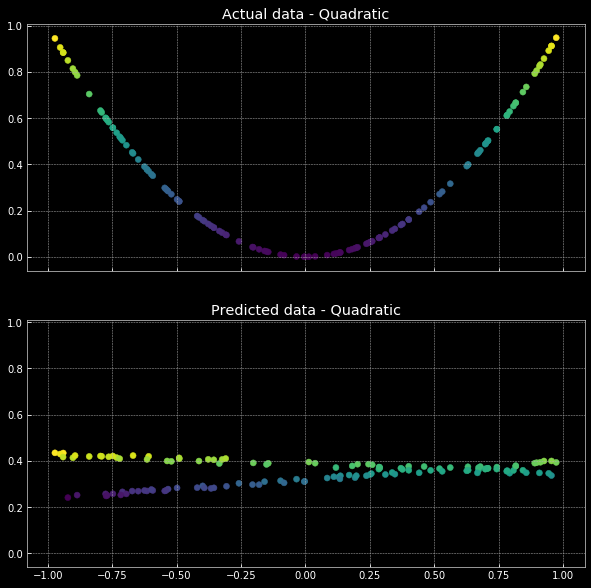

In [29]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_quadr, y_pred]
ax1.scatter(x_quadr, y_quadr, c=colors[0])
ax1.set_title('Actual data - Quadratic')
ax2.scatter(x_quadr, y_pred, c=colors[1])
ax2.set_title('Predicted data - Quadratic')

In [30]:
# Define model
model_0H = Linear_0H().to(device)

In [31]:
# Train model on cubic data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_0H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.577507734298706
Epoch 100 loss: 0.16186217963695526
Epoch 200 loss: 0.076754130423069
Epoch 300 loss: 0.04915597289800644
Epoch 400 loss: 0.03623926639556885
Epoch 500 loss: 0.02925911732017994
Epoch 600 loss: 0.02532820962369442
Epoch 700 loss: 0.02308804728090763
Epoch 800 loss: 0.021805735304951668
Epoch 900 loss: 0.021069908514618874
Epoch 1000 loss: 0.02064690925180912
Epoch 1100 loss: 0.020403385162353516
Epoch 1200 loss: 0.020263010635972023
Epoch 1300 loss: 0.020182011649012566
Epoch 1400 loss: 0.02013522945344448
Epoch 1500 loss: 0.020108189433813095
Epoch 1600 loss: 0.020092550665140152
Epoch 1700 loss: 0.02008350007236004
Epoch 1800 loss: 0.020078260451555252
Epoch 1900 loss: 0.020075226202607155
Epoch 2000 loss: 0.02007346786558628
Epoch 2100 loss: 0.02007244899868965
Epoch 2200 loss: 0.020071858540177345
Epoch 2300 loss: 0.020071515813469887
Epoch 2400 loss: 0.02007131651043892
Epoch 2500 loss: 0.020071202889084816
Epoch 2600 loss: 0.020071135833859444
Epoc

Text(0.5, 1.0, 'Predicted data - Cubuc')

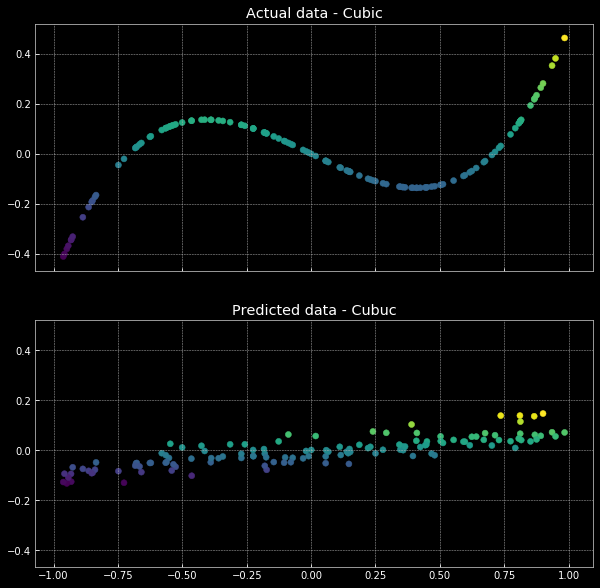

In [32]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_cubic, y_pred]
ax1.scatter(x_cubic, y_cubic, c=colors[0])
ax1.set_title('Actual data - Cubic')
ax2.scatter(x_cubic, y_pred, c=colors[1])
ax2.set_title('Predicted data - Cubuc')

In [33]:
# Define model
model_0H = Linear_0H().to(device)

In [34]:
# Train model on sine data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_0H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 1.257931113243103
Epoch 100 loss: 0.5617650747299194
Epoch 200 loss: 0.3024049401283264
Epoch 300 loss: 0.18699824810028076
Epoch 400 loss: 0.1311795562505722
Epoch 500 loss: 0.10308681428432465
Epoch 600 loss: 0.08858226239681244
Epoch 700 loss: 0.08094048500061035
Epoch 800 loss: 0.0768447294831276
Epoch 900 loss: 0.0746174156665802
Epoch 1000 loss: 0.07339141517877579
Epoch 1100 loss: 0.07270989567041397
Epoch 1200 loss: 0.07232802361249924
Epoch 1300 loss: 0.07211275398731232
Epoch 1400 loss: 0.07199078798294067
Epoch 1500 loss: 0.0719214379787445
Epoch 1600 loss: 0.07188189029693604
Epoch 1700 loss: 0.07185929268598557
Epoch 1800 loss: 0.0718463584780693
Epoch 1900 loss: 0.07183894515037537
Epoch 2000 loss: 0.07183469086885452
Epoch 2100 loss: 0.07183225452899933
Epoch 2200 loss: 0.07183084636926651
Epoch 2300 loss: 0.07183004170656204
Epoch 2400 loss: 0.07182957977056503
Epoch 2500 loss: 0.07182931154966354
Epoch 2600 loss: 0.07182915508747101
Epoch 2700 loss: 0.071

Text(0.5, 1.0, 'Predicted data - Sine')

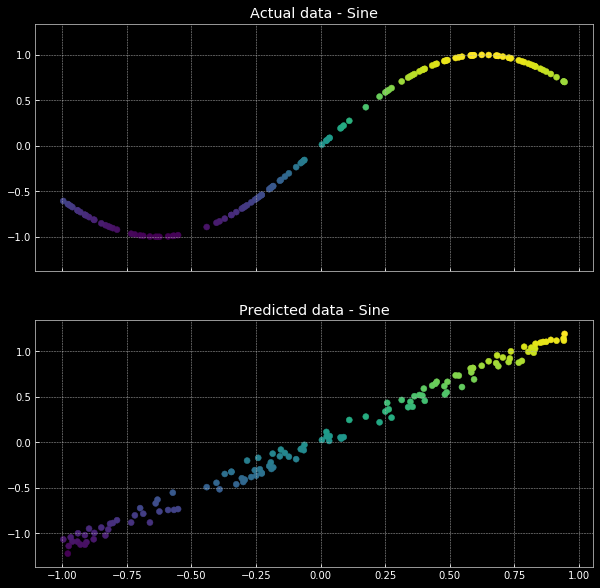

In [35]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_sine, y_pred]
ax1.scatter(x_sine, y_sine, c=colors[0])
ax1.set_title('Actual data - Sine')
ax2.scatter(x_sine, y_pred, c=colors[1])
ax2.set_title('Predicted data - Sine')

In [36]:
# Define model
model_0H = Linear_0H().to(device)

In [37]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.5125607252120972
Epoch 100 loss: 0.1599607914686203
Epoch 200 loss: 0.10053318738937378
Epoch 300 loss: 0.08659421652555466
Epoch 400 loss: 0.08163166046142578
Epoch 500 loss: 0.0793786570429802
Epoch 600 loss: 0.0782635435461998
Epoch 700 loss: 0.0776977688074112
Epoch 800 loss: 0.07740875333547592
Epoch 900 loss: 0.0772608146071434
Epoch 1000 loss: 0.07718502730131149
Epoch 1100 loss: 0.07714618742465973
Epoch 1200 loss: 0.07712627202272415
Epoch 1300 loss: 0.07711605727672577
Epoch 1400 loss: 0.07711081951856613
Epoch 1500 loss: 0.07710812985897064
Epoch 1600 loss: 0.07710675150156021
Epoch 1700 loss: 0.0771060436964035
Epoch 1800 loss: 0.07710567861795425
Epoch 1900 loss: 0.07710549235343933
Epoch 2000 loss: 0.07710539549589157
Epoch 2100 loss: 0.07710535079240799
Epoch 2200 loss: 0.0771053209900856
Epoch 2300 loss: 0.07710530608892441
Epoch 2400 loss: 0.07710529863834381
Epoch 2500 loss: 0.07710529863834381
Epoch 2600 loss: 0.07710529863834381
Epoch 2700 loss: 0.07

Text(0.5, 1.0, 'Predicted data - Abs')

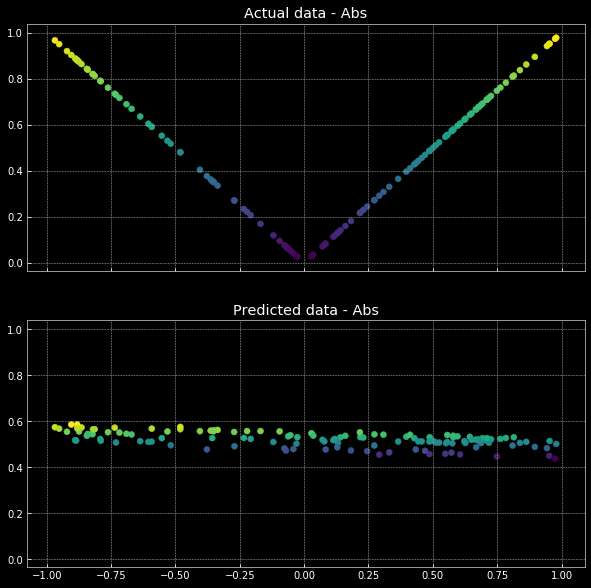

In [38]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_abs, y_pred]
ax1.scatter(x_abs, y_abs, c=colors[0])
ax1.set_title('Actual data - Abs')
ax2.scatter(x_abs, y_pred, c=colors[1])
ax2.set_title('Predicted data - Abs')

In [39]:
# Define model
model_0H = Linear_0H().to(device)

In [40]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_0H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 1.183905839920044
Epoch 100 loss: 0.3513014316558838
Epoch 200 loss: 0.16839604079723358
Epoch 300 loss: 0.10793270915746689
Epoch 400 loss: 0.08148111402988434
Epoch 500 loss: 0.06858382374048233
Epoch 600 loss: 0.062071409076452255
Epoch 700 loss: 0.058740437030792236
Epoch 800 loss: 0.05702517554163933
Epoch 900 loss: 0.056137584149837494
Epoch 1000 loss: 0.055676382035017014
Epoch 1100 loss: 0.055435847491025925
Epoch 1200 loss: 0.05530998855829239
Epoch 1300 loss: 0.05524393543601036
Epoch 1400 loss: 0.05520918220281601
Epoch 1500 loss: 0.05519085377454758
Epoch 1600 loss: 0.055181168019771576
Epoch 1700 loss: 0.055176038295030594
Epoch 1800 loss: 0.05517331883311272
Epoch 1900 loss: 0.05517187714576721
Epoch 2000 loss: 0.05517110601067543
Epoch 2100 loss: 0.0551706999540329
Epoch 2200 loss: 0.05517048016190529
Epoch 2300 loss: 0.055170364677906036
Epoch 2400 loss: 0.05517030507326126
Epoch 2500 loss: 0.055170267820358276
Epoch 2600 loss: 0.05517025291919708
Epoch 27

Text(0.5, 1.0, 'Predicted data - Heavyside step')

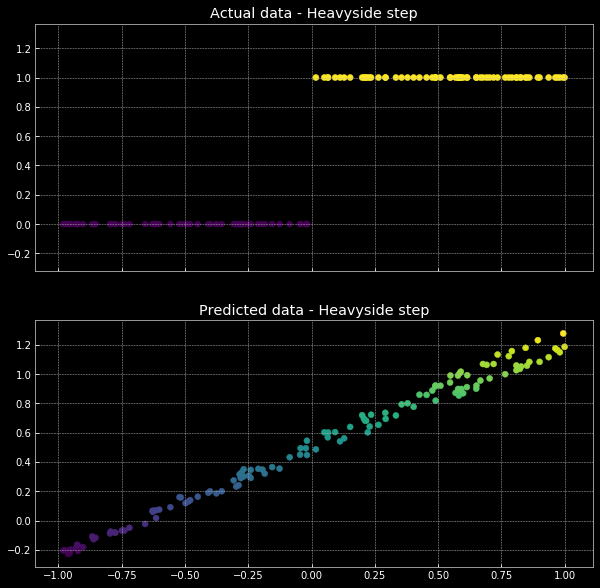

In [41]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_hs, y_pred]
ax1.scatter(x_hs, y_hs, c=colors[0])
ax1.set_title('Actual data - Heavyside step')
ax2.scatter(x_hs, y_pred, c=colors[1])
ax2.set_title('Predicted data - Heavyside step')

### 3.3. `Linear_1H`

In [61]:
# Define model
model_1H = Linear_1H().to(device)

In [62]:
# Train model on quadratic data for 10000 epochs and loss threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

Epoch 1 loss: 0.44341933727264404
Epoch 100 loss: 0.09591860324144363
Epoch 200 loss: 0.08787229657173157
Epoch 300 loss: 0.08565317839384079
Epoch 400 loss: 0.08412902802228928
Epoch 500 loss: 0.08300449699163437
Epoch 600 loss: 0.08217731863260269
Epoch 700 loss: 0.08155018091201782
Epoch 800 loss: 0.08103980869054794
Epoch 900 loss: 0.08061116933822632
Epoch 1000 loss: 0.08023813366889954
Epoch 1100 loss: 0.07990607619285583
Epoch 1200 loss: 0.07963364571332932
Epoch 1300 loss: 0.07938358932733536
Epoch 1400 loss: 0.0791500136256218
Epoch 1500 loss: 0.0789281502366066
Epoch 1600 loss: 0.07871533185243607
Epoch 1700 loss: 0.0785045474767685
Epoch 1800 loss: 0.07824838906526566
Epoch 1900 loss: 0.07797437161207199
Epoch 2000 loss: 0.07769519090652466
Epoch 2100 loss: 0.07744210213422775
Epoch 2200 loss: 0.0771595686674118
Epoch 2300 loss: 0.07682377099990845
Epoch 2400 loss: 0.07645562291145325
Epoch 2500 loss: 0.07596111297607422
Epoch 2600 loss: 0.07537758350372314
Epoch 2700 loss: 

Text(0.5, 1.0, 'Predicted data - Quadratic')

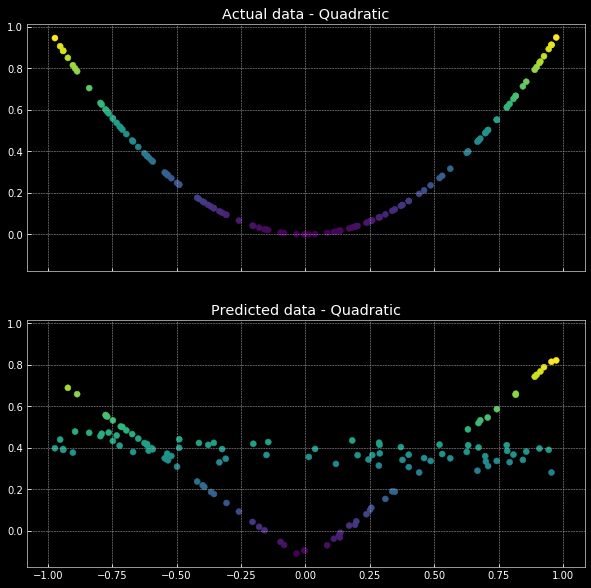

In [63]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_quadr, y_pred]
ax1.scatter(x_quadr, y_quadr, c=colors[0])
ax1.set_title('Actual data - Quadratic')
ax2.scatter(x_quadr, y_pred, c=colors[1])
ax2.set_title('Predicted data - Quadratic')

In [67]:
# Define model
model_1H = Linear_1H().to(device)

In [68]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

Epoch 1 loss: 0.04615585133433342
Epoch 100 loss: 0.027270998805761337
Epoch 200 loss: 0.024311400949954987
Epoch 300 loss: 0.02333352342247963
Epoch 400 loss: 0.022719580680131912
Epoch 500 loss: 0.022263409569859505
Epoch 600 loss: 0.021913258358836174
Epoch 700 loss: 0.021647607907652855
Epoch 800 loss: 0.021444760262966156
Epoch 900 loss: 0.021275820210576057
Epoch 1000 loss: 0.021119415760040283
Epoch 1100 loss: 0.020988209173083305
Epoch 1200 loss: 0.020875321701169014
Epoch 1300 loss: 0.020776905119419098
Epoch 1400 loss: 0.020689964294433594
Epoch 1500 loss: 0.020612165331840515
Epoch 1600 loss: 0.020536059513688087
Epoch 1700 loss: 0.020441189408302307
Epoch 1800 loss: 0.020352303981781006
Epoch 1900 loss: 0.02027844823896885
Epoch 2000 loss: 0.020219795405864716
Epoch 2100 loss: 0.020163636654615402
Epoch 2200 loss: 0.020109497010707855
Epoch 2300 loss: 0.02005700208246708
Epoch 2400 loss: 0.02000589855015278
Epoch 2500 loss: 0.019953977316617966
Epoch 2600 loss: 0.0199004020

Text(0.5, 1.0, 'Predicted data - Cubuc')

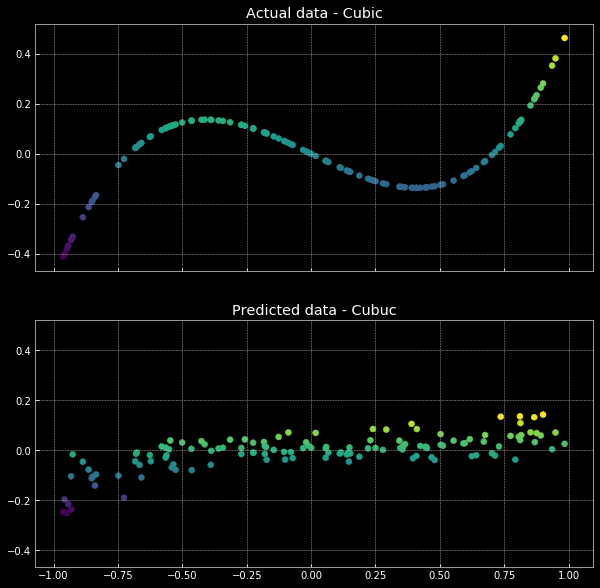

In [69]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_cubic, y_pred]
ax1.scatter(x_cubic, y_cubic, c=colors[0])
ax1.set_title('Actual data - Cubic')
ax2.scatter(x_cubic, y_pred, c=colors[1])
ax2.set_title('Predicted data - Cubuc')

In [70]:
# Define model
model_1H = Linear_1H().to(device)

In [71]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

Epoch 1 loss: 0.8090000748634338
Epoch 100 loss: 0.5975650548934937
Epoch 200 loss: 0.5079569220542908
Epoch 300 loss: 0.43117567896842957
Epoch 400 loss: 0.36480283737182617
Epoch 500 loss: 0.3088459074497223
Epoch 600 loss: 0.26021087169647217
Epoch 700 loss: 0.21317800879478455
Epoch 800 loss: 0.168222576379776
Epoch 900 loss: 0.1294725388288498
Epoch 1000 loss: 0.10034240037202835
Epoch 1100 loss: 0.08141817897558212
Epoch 1200 loss: 0.0700281411409378
Epoch 1300 loss: 0.06336861103773117
Epoch 1400 loss: 0.05945516377687454
Epoch 1500 loss: 0.0569964237511158
Epoch 1600 loss: 0.0554032027721405
Epoch 1700 loss: 0.05422281101346016
Epoch 1800 loss: 0.05332573130726814
Epoch 1900 loss: 0.05263077840209007
Epoch 2000 loss: 0.05210033059120178
Epoch 2100 loss: 0.051657646894454956
Epoch 2200 loss: 0.0512796975672245
Epoch 2300 loss: 0.05095170810818672
Epoch 2400 loss: 0.05066339671611786
Epoch 2500 loss: 0.05040718615055084
Epoch 2600 loss: 0.05017729476094246
Epoch 2700 loss: 0.0499

Text(0.5, 1.0, 'Predicted data - Sine')

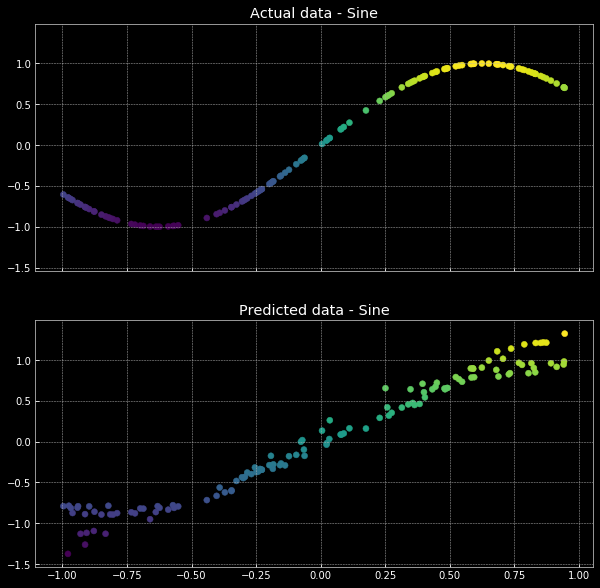

In [72]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_sine, y_pred]
ax1.scatter(x_sine, y_sine, c=colors[0])
ax1.set_title('Actual data - Sine')
ax2.scatter(x_sine, y_pred, c=colors[1])
ax2.set_title('Predicted data - Sine')

In [73]:
# Define model
model_1H = Linear_1H().to(device)

In [74]:
# Train model on abosulte value data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

Epoch 1 loss: 0.24472549557685852
Epoch 100 loss: 0.08961638808250427
Epoch 200 loss: 0.08031671494245529
Epoch 300 loss: 0.07645900547504425
Epoch 400 loss: 0.07358768582344055
Epoch 500 loss: 0.07143117487430573
Epoch 600 loss: 0.06962677091360092
Epoch 700 loss: 0.06807763129472733
Epoch 800 loss: 0.06670814007520676
Epoch 900 loss: 0.0654732808470726
Epoch 1000 loss: 0.06437578797340393
Epoch 1100 loss: 0.06334327906370163
Epoch 1200 loss: 0.06236317381262779
Epoch 1300 loss: 0.06139172986149788
Epoch 1400 loss: 0.060425203293561935
Epoch 1500 loss: 0.059493690729141235
Epoch 1600 loss: 0.058558832854032516
Epoch 1700 loss: 0.05761721357703209
Epoch 1800 loss: 0.056666672229766846
Epoch 1900 loss: 0.055704470723867416
Epoch 2000 loss: 0.05473111942410469
Epoch 2100 loss: 0.05377619341015816
Epoch 2200 loss: 0.052855923771858215
Epoch 2300 loss: 0.05193430185317993
Epoch 2400 loss: 0.05102948099374771
Epoch 2500 loss: 0.05013640224933624
Epoch 2600 loss: 0.04924646019935608
Epoch 27

Text(0.5, 1.0, 'Predicted data - Abs')

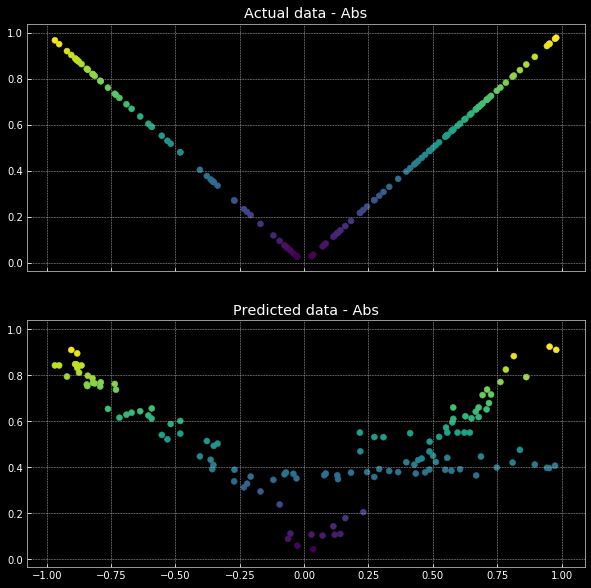

In [75]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_abs, y_pred]
ax1.scatter(x_abs, y_abs, c=colors[0])
ax1.set_title('Actual data - Abs')
ax2.scatter(x_abs, y_pred, c=colors[1])
ax2.set_title('Predicted data - Abs')

In [82]:
# Define model
model_1H = Linear_1H().to(device)

In [83]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_1H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

Epoch 1 loss: 0.6914451718330383
Epoch 100 loss: 0.2326953411102295
Epoch 200 loss: 0.19482573866844177
Epoch 300 loss: 0.1735958307981491
Epoch 400 loss: 0.15330852568149567
Epoch 500 loss: 0.13025523722171783
Epoch 600 loss: 0.10756123065948486
Epoch 700 loss: 0.08942831307649612
Epoch 800 loss: 0.07595498114824295
Epoch 900 loss: 0.06673607230186462
Epoch 1000 loss: 0.0607241615653038
Epoch 1100 loss: 0.05693627521395683
Epoch 1200 loss: 0.05448263883590698
Epoch 1300 loss: 0.05283067375421524
Epoch 1400 loss: 0.051708806306123734
Epoch 1500 loss: 0.050869446247816086
Epoch 1600 loss: 0.05024155601859093
Epoch 1700 loss: 0.0497504286468029
Epoch 1800 loss: 0.04934753105044365
Epoch 1900 loss: 0.04903523251414299
Epoch 2000 loss: 0.04877280071377754
Epoch 2100 loss: 0.048537496477365494
Epoch 2200 loss: 0.04832044616341591
Epoch 2300 loss: 0.0481160506606102
Epoch 2400 loss: 0.04792036488652229
Epoch 2500 loss: 0.04773058369755745
Epoch 2600 loss: 0.04754467308521271
Epoch 2700 loss:

Text(0.5, 1.0, 'Predicted data - Heavyside step')

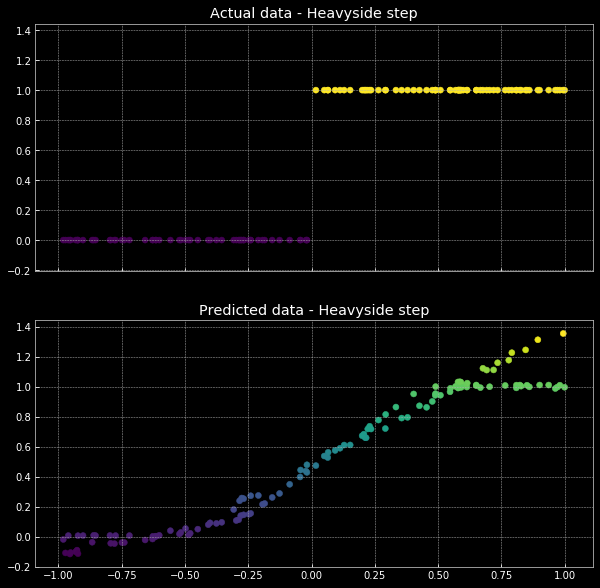

In [84]:
# Plot predictions vs actual data
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, sharey=True)
colors = [y_hs, y_pred]
ax1.scatter(x_hs, y_hs, c=colors[0])
ax1.set_title('Actual data - Heavyside step')
ax2.scatter(x_hs, y_pred, c=colors[1])
ax2.set_title('Predicted data - Heavyside step')

### 3.3. `Linear_2H`

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on quadratic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_quadr, y=y_quadr, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on cubic data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_cubic, y=y_cubic, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on sine data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_sine, y=y_sine, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on abosulte value data for 10000 epochs and loss_threshold=1e-2
y_pred = train(model_2H, epochs=10000, x=x_abs, y=y_abs, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

In [ ]:
# Define model
model_2H = Linear_2H().to(device)

In [ ]:
# Train model on Heavyside Step Function data for 10000 epochs and loss_threshold 1e-2
y_pred = train(model_2H, epochs=10000, x=x_hs, y=y_hs, loss_threshold=1e-2)

In [ ]:
# Plot predictions vs actual data
# TODO

### 3.4. Which of the models stopped early and on what data?
Please list the experiments where the `loss_threshold` of 1e-2 was reached early. 

List: 